In [113]:
# IMPORTING MODULES
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
# import plotly.express as px
# import chart_studio.plotly as py
# import plotly.figure_factory as ff
# import plotly.graph_objects as go


## Setting up path variables for easy and [generalized ?] access throughout the notebook

In [6]:
# SETTING PATH VARIABLES
JUDICIAL_DATA_CSV_FOLDER_PATH = "/kaggle/input/precog-recruitment-task-csv/"

ACTS_SECTIONS_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "acts_sections.csv"
                    )

CASES_CSV_FOLDER = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "cases/cases/"
                    )

JUDGES_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH,
                        "judges_clean/judges_clean.csv"
                    )
KEYS_CSV = os.path.join(
                        JUDICIAL_DATA_CSV_FOLDER_PATH, 
                        "keys.csv"
                    )



# To test if the file is being read properly #

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

### Analyzing cases csv data 

- We will read the csv file first
- We will later change this to a for-loop so we can loop through every csv file




In [3]:
# ()
#     df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv"))
#     df.head()
# joined_files = os.path.join(CASES_CSV_FOLDER, "cases_*.csv")
# joined_list = glob.glob(joined_files)
# df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)


In [4]:
## Messing around

# df = df.sort_values(by = ['date_of_filing'], ascending = False)
# df.head()

### Plotting the number of pending cases 

#### How the data was preprocessed and analyzed?
- This was achieved by using the `date-of-filing` and `date-of-decision` columns
- A case is considered pending on a given date if the `date-of-filing` has passed but the `date-of-decision` has not been passed.
- The columns `date-of-filing` and `date-of-decision` were cleaned using the `Pandas.to_datetime()` method with the parameter `errors = coerce` to fill `NaT` in entries which were not in the correct `TimeStamp` format.
- The previous steps ensures that there are no faulty entries in either columns.
- A frequency map was created using `DataFrame[column].value_counts()`.
- Frequency of non occurent dates were filled with zeros using the `PandaSeries.reindex(range_of_dates, fill_value=0)` method.
- The graph is only shown for the given year, since, no cases filed after the given year are actually present in the `csv` file.

In [114]:
def pending_cases(df : pd.DataFrame, case_csv_year : int): 
    df['date_of_filing'] = pd.to_datetime(
        df['date_of_filing'], errors='coerce'
    ).dt.date

    df['date_of_decision'] = pd.to_datetime(
        df['date_of_decision'], errors='coerce'
    ).dt.date
    
    range_of_dates = pd.date_range(
                        f"{case_csv_year}-01-01", 
                        f"{case_csv_year+1}-01-01"
                    )

    freq_filed_cases = df['date_of_filing'].value_counts()\
                                           .asfreq('D', fill_value=0)

#     freq_solved_cases = df['date_of_decision'].value_counts()\
#                                               .asfreq('D', fill_value=0)

#     freq_pending_cases = freq_filed_cases.subtract(freq_solved_cases)

    df_pending_cases = pd.DataFrame({
            'Date' : freq_filed_cases.index, 
            'Num_filed_cases' : freq_filed_cases.values, 
        })
    
    df_pending_cases['Weekday'] = df_pending_cases['Date'].dt.day_name()
    
    cats = [ 'Monday', 'Tuesday', 'Wednesday', \
            'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    freq_cases_on_weekday = df_pending_cases.groupby(['Weekday']).sum().reindex(cats) 
    freq_cases_on_weekday['Weekday'] = freq_cases_on_weekday['Weekday'].astype(cat_type)                             
    
#     freq_cases_on_weekday = freq_cases_on_weekday.set_index([
#                                                     'weekday',
#                                                     'Num_filed_cases'
#                                                  ]).reindex()

#     freq_cases_on_weekday = df_pending_cases.groupby('weekday')\
#                                             ['Num_filed_cases']\
#                                             .transform('sum')
        
#     df_weekday_cases = pd.DataFrame({
#             'Weekday' : freq_cases_on_weekday['Weekday'], 
#             'Num_filed_cases' : freq_cases_on_weekday['Num_filed_cases'], 
#         })
#     df_weekday_cases = freq_cases_on_weekday
    
    return df_pending_cases, df_weekday_cases

In [115]:
df_pending_cases, df_weekday_cases = pending_cases(curr_df, 2014)
case_csv_year = 2014



# pending_cases_plot_img(df_pending_cases, case_csv_year)
# df_weekday_cases.plot()
# df_weekday_cases.plot(
#         x = ['Weekday'], 
#         y = ['Num_filed_cases'], 
#         figsize = (15,4)
#     )
# df_weekday_cases = df_weekday_cases.T
# print(df_weekday_cases.index)
# df_weekday_cases.plot.bar(
#                     x = ['Weekday'], 
#                     y = ['Num_filed_cases'],
#                 )
df_weekday_cases.head(10)
# df_weekday_cases.plot(
#         x = df_weekday_cases['Weekday']
# )

KeyError: 'Weekday'

In [7]:
curr_df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv"))

## Pending Cases plotter
- The number of cases received [TBX]

In [72]:
def pending_cases_plot_img(df : pd.DataFrame, case_csv_year : int):
    fig = df.plot(
        x = 'Date', 
        y = ['Num_filed_cases'], 
        xlim = (f'{case_csv_year}-01-01', f'{case_csv_year + 1}-01-01'),
        ylim = (0,150000),
        figsize = (15,4)
    )
    return fig

## Iterating through all cases csv files
- Since, each `cases_[year].csv` is massive (~1-2 gigabytes) we will use a diff subplot for each csv file
- Each plot image is stored in a `plot_img_list`

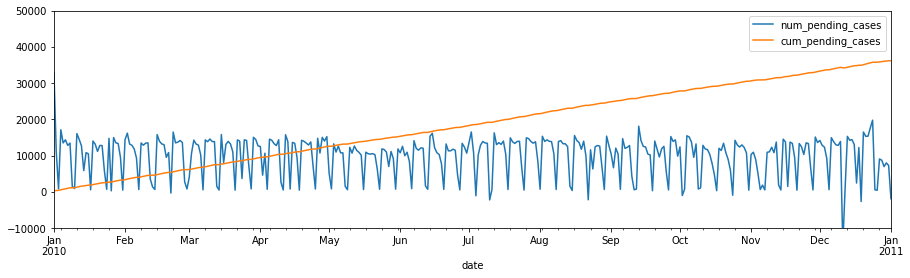

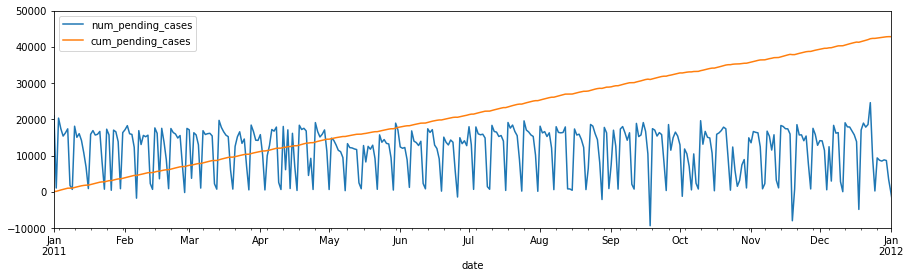

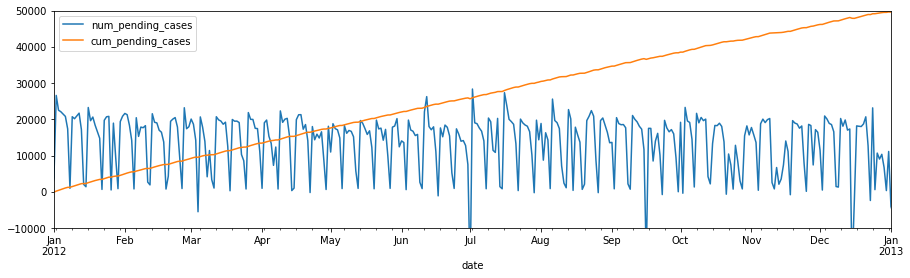

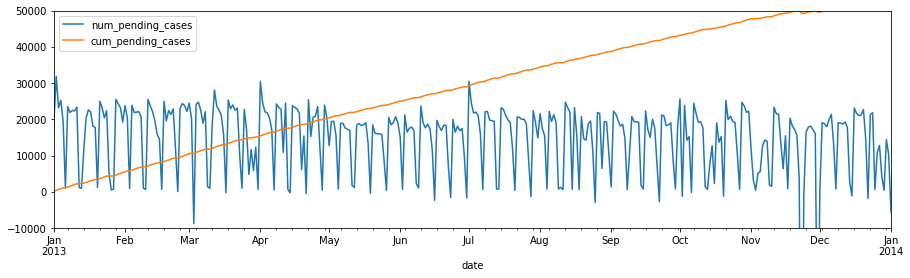

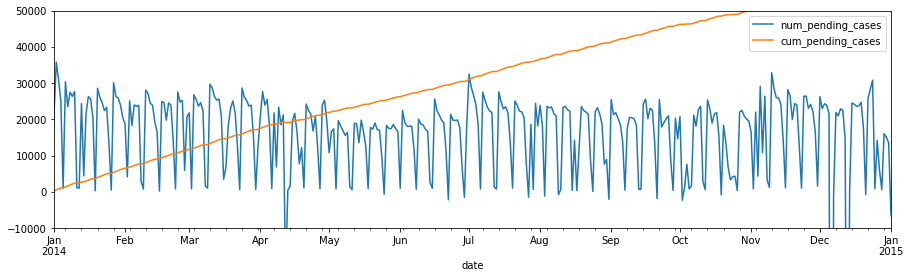

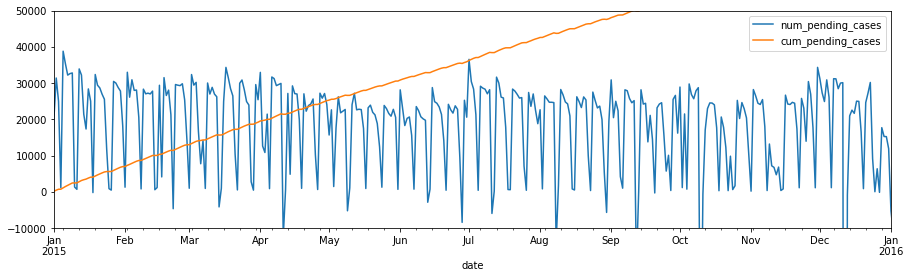

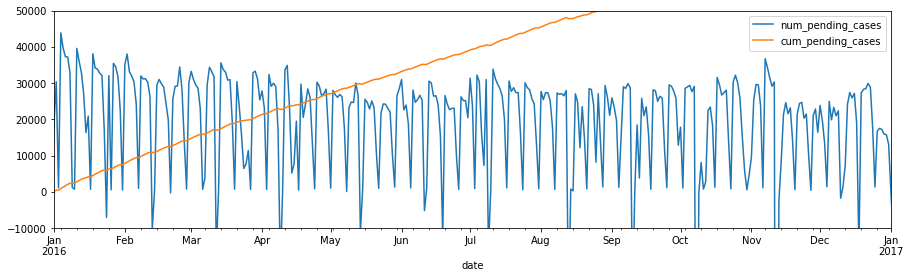

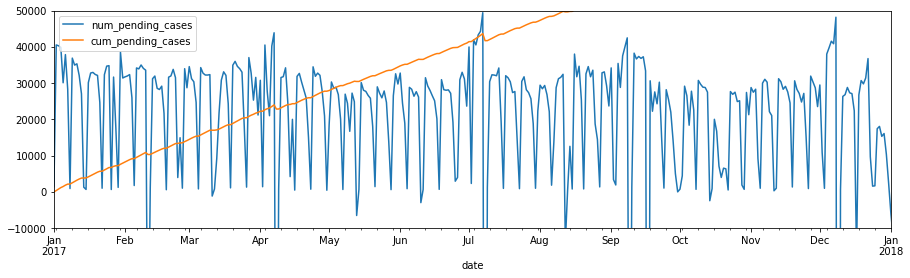

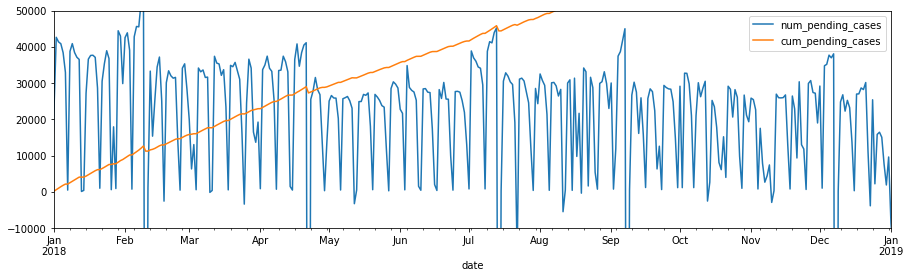

In [7]:
plot_img_list = []
df_list = []
for year in range(2010, 2019):
    curr_df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, f"cases_{year}.csv"))
    df_pending_cases, freq_weekday_case = pending_cases(curr_df, year)
    plot_img_list.append(pending_cases_plot_img(df_pending_cases, year))

## Plotting number of cases filed on each day
- The `plot_img_list` obtained earlier can be iterated over and shown as subplots

In [18]:
curr_df = pd.read_csv(os.path.join(CASES_CSV_FOLDER, "cases_2014.csv")
df_pending_cases = pending_cases(curr_df, 2014)

# df.head()

SyntaxError: invalid syntax (906184810.py, line 2)

In [19]:
curr_df_pending = pending_cases(curr_df)
curr_df_pending['weekday'] = curr_df_pending['date'].dt.day_name()

# curr_df_pending.head()


freq_weekday = curr_df_pending.groupby(['weekday']).sum()
freq_weekday.head()

NameError: name 'curr_df' is not defined

# Insights on graphs obtained:
- It can be observed that the number of cases filed everyday violently oscillates.
- The order of number of cases filed on peak days is of the order of 30000.
- The number of cases filed on peak days has steadily increased over the years.
- 

# CLASSIFICATION PROBLEM IDEAS

- Given a day and Case ID, will it be decided on a given day.
- Given a day and Case ID, will it be decided on the next case day.
- 
- 

# Bibliography
- https://stackoverflow.com/questions/50089903/convert-column-to-timestamp-pandas-dataframe
- https://www.geeksforgeeks.org/get-minimum-values-in-rows-or-columns-with-their-index-position-in-pandas-dataframe/
- https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
- https://www.w3schools.com/python/pandas/ref_df_min.asp#:~:text=The%20min()%20method%20returns,minimum%20value%20for%20each%20row.
- https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/
- https://www.datasciencemadesimple.com/create-frequency-table-of-column-in-pandas-python-2/
- https://datagy.io/pandas-value-counts/
- https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
- https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
-  https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe
-  https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe
-  https://stackoverflow.com/questions/61233041/module-not-found-error-no-module-named-chart-studio
-  https://plotly.com/python/ipython-notebook-tutorial/
- https://stackoverflow.com/questions/68149831/find-if-date-is-weekend-or-weekday-in-pandas-dataframe
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
- https://stackoverflow.com/questions/28503445/assigning-column-names-to-a-pandas-series
- https://pynative.com/pandas-set-index/
- 